In [1]:
#Import pandas and read the files
import pandas as pd

dfLabel = pd.read_csv('./Yield.csv')
dfContent = pd.read_csv('./WAT.csv')

In [2]:
#Merge two dataframes into one dataframe
dfData = pd.concat([dfLabel, dfContent], axis = 1)

#Delete the useless information
dfData.drop(['Unnamed: 0'], axis = 1, inplace = True)

#Changing the columns
tempWaferId = dfData['wafer_id']
dfData.drop(['wafer_id'], axis = 1, inplace = True)
dfData.insert(0, 'wafer_id', tempWaferId)

#Remember the column's index
keys = dfData.columns

In [3]:
#Import numpy to calculate the pearson coefficient
import numpy as np

coeffs = [0, 0]
for i in range(2, len(keys)):
    coeffs.append(np.corrcoef(dfData[keys[i]].T, dfData[[keys[1]]].T)[0, 1])
    
#Turn the list into series
dfCoeff = pd.Series(coeffs, index = keys)

#Fing the ten largest value
dfPrint = dfCoeff.nlargest(10)

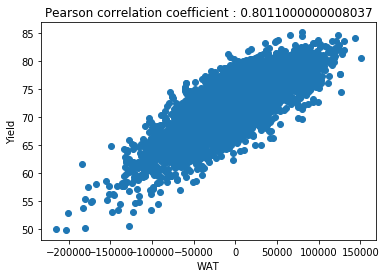

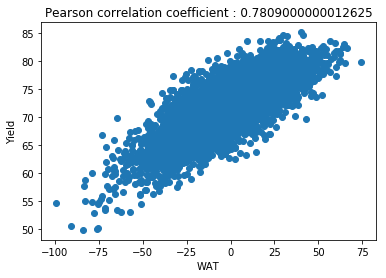

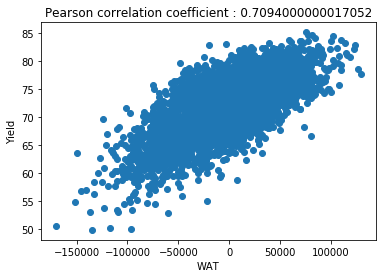

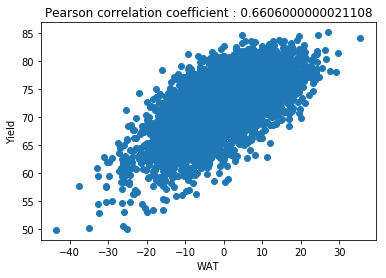

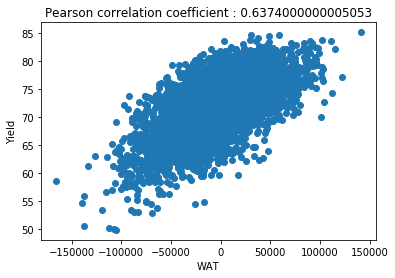

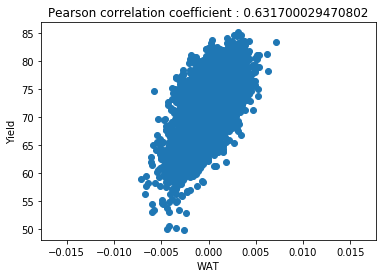

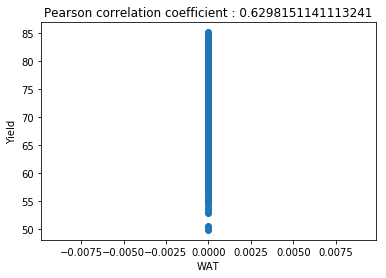

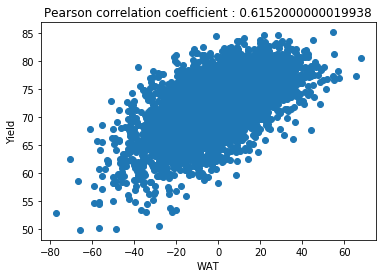

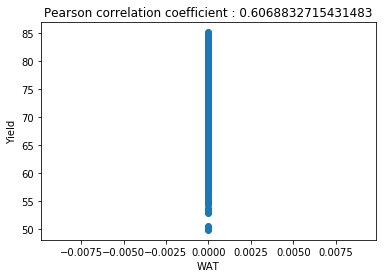

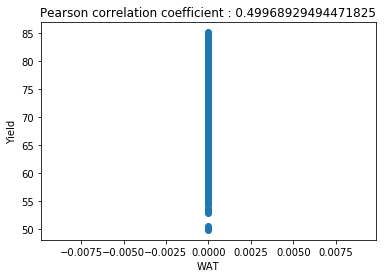

In [5]:
#Print the chart
import matplotlib.pyplot as plt

for index in dfPrint.index:
    plt.title('Pearson correlation coefficient : ' + str(dfPrint[index]))
    plt.xlabel('WAT')
    plt.ylabel('Yield')
    plt.scatter(dfData[index].T, dfData[keys[1]].T)
    plt.savefig('HW1_%s' %index)
    plt.show()